In [ ]:
# %pip list
%pip install seaborn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [38]:
# check datasets attributes
data = datasets.load_linnerud(return_X_y=False, as_frame=True)

# data.data
# data.target
## Merge both as DataFrame
df1 = pd.merge(data.data, data.target, left_index=True, right_index=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [45]:
df1.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [39]:
df1.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


<AxesSubplot:>

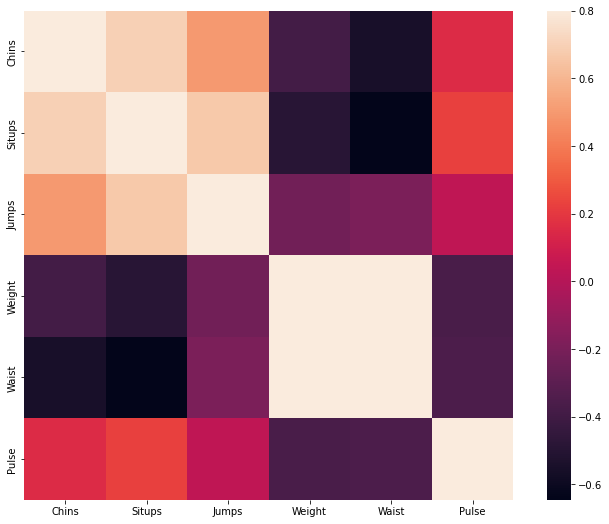

In [5]:
# Heatmap presentation
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

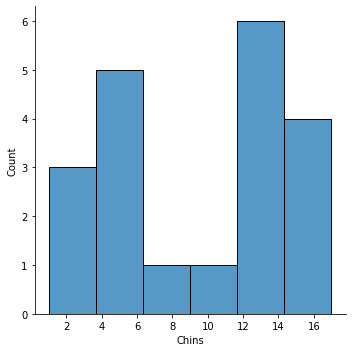

In [46]:
sns.displot(df1['Chins'])

In [47]:
df1['Chins'].describe()

count    20.000000
mean      9.450000
std       5.286278
min       1.000000
25%       4.750000
50%      11.500000
75%      13.250000
max      17.000000
Name: Chins, dtype: float64

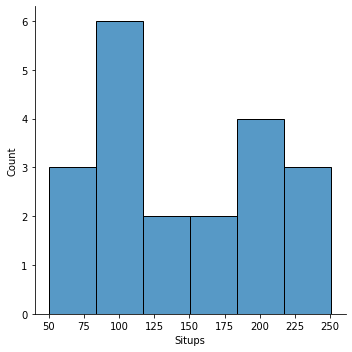

In [42]:
sns.displot(df1['Situps'])

In [48]:
df1['Situps'].describe()

count     20.000000
mean     145.550000
std       62.566575
min       50.000000
25%      101.000000
50%      122.500000
75%      210.000000
max      251.000000
Name: Situps, dtype: float64

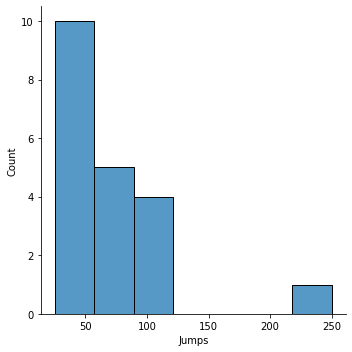

In [43]:
sns.displot(df1['Jumps'])

In [44]:
df1['Jumps'].describe()

count     20.00000
mean      70.30000
std       51.27747
min       25.00000
25%       39.50000
50%       54.00000
75%       85.25000
max      250.00000
Name: Jumps, dtype: float64

In [9]:
# print(X.shape)
# print(X[0])
# DataFrame
X, y =  datasets.load_linnerud(return_X_y=True)

# X.head(10)
# y.head(10)

In [10]:
print(y.shape)
print(y[0])

# Normalize X variable and all of the values were
# converted to levels between 0 and 1
X = (X-X.min())/(X.max()-X.min())

print(X)

(20, 3)
[191.  36.  50.]
[[0.016 0.644 0.236]
 [0.004 0.436 0.236]
 [0.044 0.4   0.4  ]
 [0.044 0.416 0.144]
 [0.048 0.616 0.228]
 [0.012 0.4   0.164]
 [0.028 0.4   0.148]
 [0.02  0.496 0.156]
 [0.056 0.796 0.156]
 [0.064 1.    0.996]
 [0.064 0.476 0.148]
 [0.048 0.836 0.456]
 [0.052 0.856 0.416]
 [0.    0.196 0.196]
 [0.02  0.276 0.12 ]
 [0.044 0.836 0.476]
 [0.012 0.236 0.096]
 [0.04  0.916 0.316]
 [0.056 0.896 0.288]
 [0.004 0.436 0.168]]


In [11]:
# split the data into training / testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16, 3), (4, 3), (16, 3), (4, 3))

In [12]:
# Because the target has multiple columns, I used sklearn’s 
# MultiOutputRegressor() to separate the predictions into 3 separate columns.
from sklearn.multioutput import  MultiOutputRegressor
from sklearn.linear_model import Ridge

In [13]:
# create linear regression object
model  = MultiOutputRegressor(Ridge(random_state=1))
# Train the model using the training sets
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=Ridge(random_state=1))

In [14]:
print(model.score(X_train, y_train))


0.20830103270043823


In [17]:
# Make the prediction using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)
y_pred = model.predict(X_test)

y_pred


array([[184.92580908,  36.17344929,  55.58146426],
       [190.13924816,  36.99694187,  54.9166932 ],
       [185.36943745,  36.25285227,  55.5113859 ],
       [183.22886087,  35.89304849,  55.81615889]])

In [18]:
# The coefficients
# print("Coefficients: \n", model.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# print("coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
print("coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 139.08
coefficient of determination: 0.02


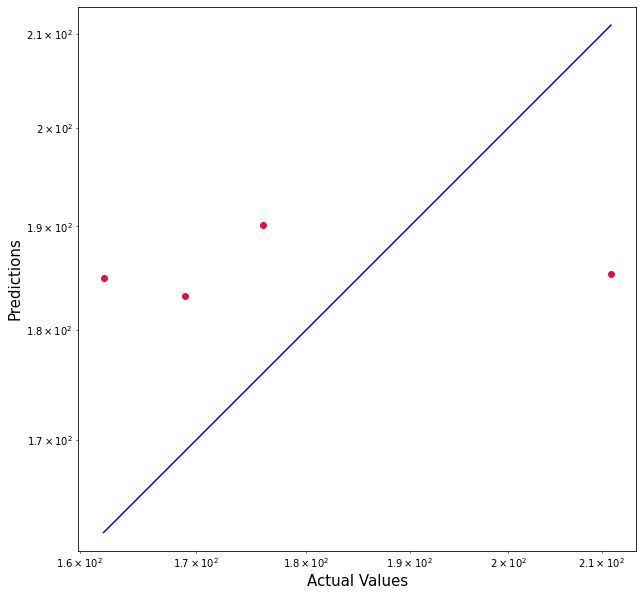

In [31]:
# Plot outputs
plt.figure(figsize=(10,10))
plt.scatter(y_test[:,0], y_pred[:,0], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(y_pred[:,0].max(), y_test[:,0].max())
p2 = min(y_pred[:,0].min(), y_test[:,0].min())

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.show()

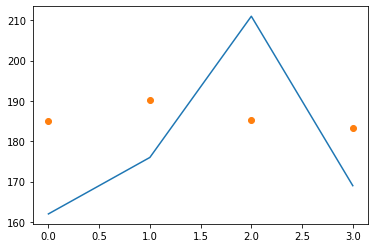

In [32]:
plt.plot(y_test[:,0])
plt.plot(y_pred[:,0], 'o')
plt.show()

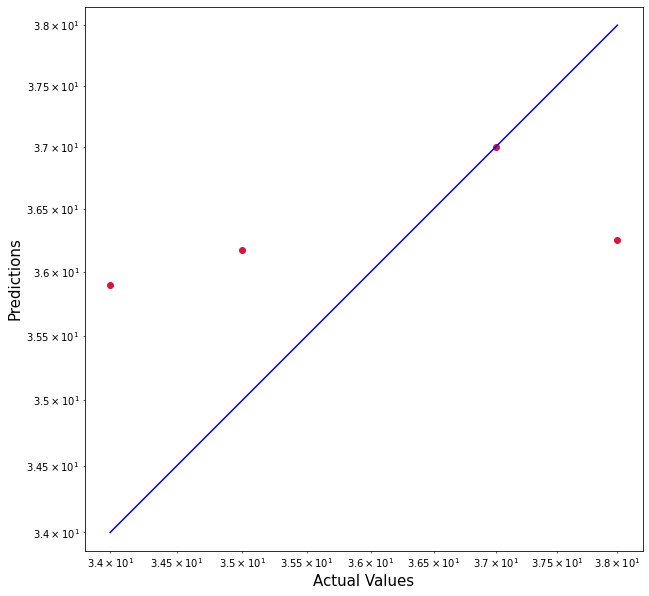

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test[:,1], y_pred[:,1], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(y_pred[:,1].max(), y_test[:,1].max())
p2 = min(y_pred[:,1].min(), y_test[:,1].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

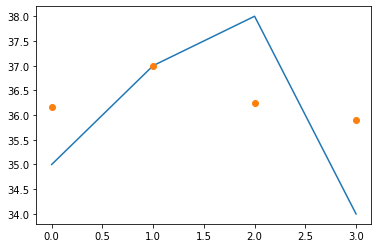

In [30]:
plt.plot(y_test[:,1])
plt.plot(y_pred[:,1], 'o')
plt.show()

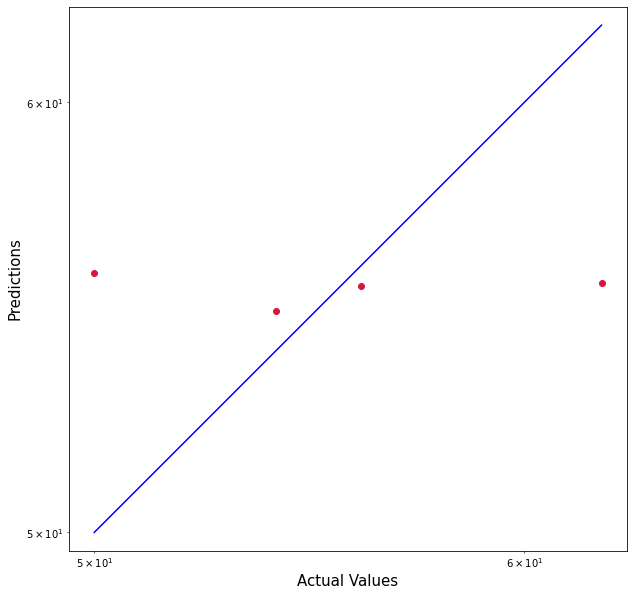

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(y_test[:,2], y_pred[:,2], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(y_pred[:,2].max(), y_test[:,2].max())
p2 = min(y_pred[:,2].min(), y_test[:,2].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

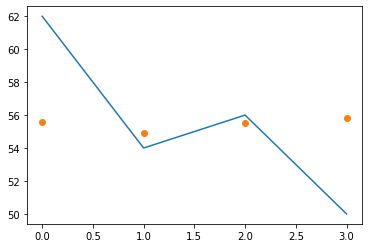

In [37]:
plt.plot(y_test[:,2])
plt.plot(y_pred[:,2], 'o')
plt.show()